In [71]:
"""import sys
!conda install --yes --prefix {sys.prefix}  plotly plotly 
#This is a really cool way to install modules right from Jupyter"""
!pip install plotly

    100% |████████████████████████████████| 24.9MB 19kB/s  eta 0:00:01
  Using cached nbformat-4.4.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 512kB 566kB/s eta 0:00:01
  Using cached requests-2.18.4-py2.py3-none-any.whl
  Using cached jsonschema-2.6.0-py2.py3-none-any.whl
  Using cached chardet-3.0.4-py2.py3-none-any.whl
  Using cached certifi-2018.1.18-py2.py3-none-any.whl
  Using cached urllib3-1.22-py2.py3-none-any.whl
  Using cached idna-2.6-py2.py3-none-any.whl
  Using cached functools32-3.2.3-2.zip
  Running setup.py bdist_wheel for plotly ... done
  Stored in directory: /Users/yadapruksachatkun/Library/Caches/pip/wheels/35/e4/58/50b15ca81e61bd553172ca2dc2ddf4a53278da34f3a9d8e5e9
  Running setup.py bdist_wheel for functools32 ... done
  Stored in directory: /Users/yadapruksachatkun/Library/Caches/pip/wheels/3c/d0/09/cd78d0ff4d6cfecfbd730782a7815a4571cd2cd4d2ed6e69d9
Successfully built plotly functools32
  Found existing installation: certifi 2016.2.28
    

In [3]:
import pandas as pd
test_data=pd.read_csv('./test.csv')
train_data =pd.read_csv('./train.csv')

# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 
import site; site.getsitepackages()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (11,13,48,50,55,90,125,144,162,163,164,166,168,169,170,171,172,174,176,241,243,245,247,251,254,273,289,291,292,293,295,296,312,313,314,331,343,365,373,375,396,413,439,490,619,623,630,633,638,642,644,669,712,759,768,788,809,828,928,953,978,1000,1001,1002,1003,1004,1023,1036,1040,1042,1063,1085,1098,1099,1120,1128,1135,1151,1152,1165,1167,1181,1192,1204,1205,1206,1207,1215,1225,1227,1229,1231,1233) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (12,49,51,56,91,126,145,163,165,166,167,168,169,171,173,174,176,177,242,244,246,248,252,255,274,290,291,292,294,295,296,332,344,366,374,376,397,414,440,491,620,634,639,642,643,645,710,713,760,769,810,829,929,954,979,1001,1002,1003,1004,1005,1024,1037,1041,1043,

['/opt/conda/lib/python3.6/site-packages']

In [5]:
from sklearn import decomposition

In [6]:
cols_to_remove = []

for col in train_data.columns:
    try:
        _ = train_data[col].astype(float)
    except ValueError:
        cols_to_remove.append(col)
        pass

# keep only the columns in df that do not contain string
train_data_new = train_data[[col for col in train_data.columns if col not in cols_to_remove]]
train_data_new[:10]

,train_id,AA3,AA4,AA5,AA6,AA7,AA14,AA15,DG1,is_female,DG3,DG3A,DG4,DG4_OTHERS,DG5_1,DG5_2,DG5_3,DG5_4,DG5_5,DG5_6,DG5_7,DG5_8,DG5_9,DG5_10,DG5_11,DG5_96,DG6,DG8a,DG8b,DG8c,...,FB27_96,FB28_1,FB28_2,FB28_3,FB28_4,FB28_5,FB28_6,FB28_7,FB28_8,FB28_9,FB28_96,FB28_3_OTHERS,FB29_1,FB29_2,FB29_3,FB29_4,FB29_5,FB29_6,FB29_96,LN1A,LN1B,LN2_1,LN2_2,LN2_3,LN2_4,GN1,GN2,GN3,GN4,GN5
0,0,3,32,3.0,NaN,323011,3854,481,1975,1,3,4,5,NaN,1,2,2,2,2,1,1,2,2,2,2,2,2,4,1,0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,1,1,1,1,1,1,99.0,99,99,99,99
1,1,2,26,NaN,8.0,268131,2441,344,1981,1,8,4,5,NaN,2,2,2,2,2,1,1,2,2,1,2,2,2,4,1,0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,3,3,1,1,3,4,NaN,1,2,2,2
2,2,1,16,NaN,7.0,167581,754,143,1995,1,3,2,2,NaN,1,2,2,2,2,1,1,2,2,1,2,2,7,4,2,2,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,4,4,1,1,2,2,1.0,2,2,2,2
3,3,4,44,5.0,NaN,445071,5705,604,1980,1,3,4,5,NaN,1,2,2,2,2,1,1,2,2,2,2,2,2,2,2,99,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,3,2,1,1,4,5,NaN,2,2,99,99
4,4,4,43,NaN,6.0,436161,5645,592,1958,1,3,4,6,NaN,1,2,2,2,1,1,1,2,2,2,2,2,2,99,0,0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,1,2,4,4,4,NaN,1,1,1,1
5,5,3,35,NaN,8.0,358081,3319,409,1976,0,3,4,4,NaN,1,2,2,2,2,2,2,2,2,2,2,2,1,3,0,0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,3,3,1,1,5,5,4.0,2,1,1,1
6,6,3,35,NaN,7.0,357091,3247,401,1998,0,1,4,6,NaN,1,2,2,2,1,2,1,1,2,2,2,2,3,5,2,1,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,3,3,1,1,1,1,4.0,4,4,4,4
7,7,4,41,4.0,NaN,414021,4459,535,1991,0,3,4,10,NaN,1,2,2,2,2,1,1,2,2,1,2,2,1,2,0,0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2,2,2,2,2,2,2,1,1,4,4,3.0,3,3,3,3
8,8,1,16,2.0,NaN,162011,890,175,1958,0,5,4,7,NaN,1,1,2,2,2,1,1,1,2,1,2,2,1,2,0,0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,1,1,4,3,1,1,1.0,1,2,2,1
9,9,3,34,NaN,7.0,347242,3959,398,1984,1,5,4,5,NaN,1,2,2,2,2,1,1,2,2,2,2,2,2,2,2,0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,1,1,4,4,3.0,3,3,3,3


In [15]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
cleaned_train_data = imp.fit_transform(train_data_new)
cleaned_train_data



array([[  0.00000000e+00,   3.00000000e+00,   3.20000000e+01, ...,
          9.90000000e+01,   9.90000000e+01,   9.90000000e+01],
       [  1.00000000e+00,   2.00000000e+00,   2.60000000e+01, ...,
          2.00000000e+00,   2.00000000e+00,   2.00000000e+00],
       [  2.00000000e+00,   1.00000000e+00,   1.60000000e+01, ...,
          2.00000000e+00,   2.00000000e+00,   2.00000000e+00],
       ..., 
       [  1.82520000e+04,   3.00000000e+00,   3.40000000e+01, ...,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  1.82530000e+04,   1.00000000e+00,   1.40000000e+01, ...,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00],
       [  1.82540000e+04,   1.00000000e+00,   1.60000000e+01, ...,
          3.00000000e+00,   3.00000000e+00,   3.00000000e+00]])

In [17]:
pca = decomposition.PCA(n_components=3)
Y_sklearn = pca.fit_transform(cleaned_train_data)
pcaR = pca.fit(cleaned_train_data)

(18255, 1139)


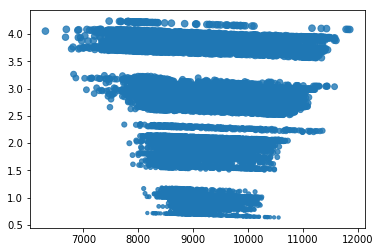

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# print(pcaR.components_)
# print(Y_sklearn.shape)
print(X_new.shape)
X_new = pca.inverse_transform(Y_sklearn)
plt.scatter(X_new[:,0], X_new[:,1],X_new[:,2], alpha = 0.8)